<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [22]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


There are 816 missing values in the column ConvertedComp


<AxesSubplot:xlabel='ConvertedComp'>

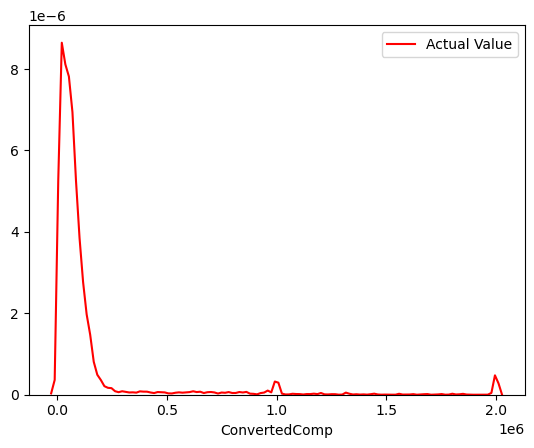

In [19]:
# There are 816 missing values in the column converted comp
print("There are", df['ConvertedComp'].isnull().sum(), "missing values in the column ConvertedComp") #There are 816 missing values in the column Converted Comp
#Normalising data
#sns.distplot(df ['ConvertedComp'].dropna(),hist=False)
#df['ConvertedComp'].fillna(df['ConvertedComp'].mean(), inplace=True)
#Using seaborn to plot distplot as requested although a histogram, boxplot or scatterplot is likely to provide some more information.
sns.distplot(df['ConvertedComp'], hist=False, color= 'r', label= 'Actual Value')

Plot the histogram for the column `ConvertedComp`.


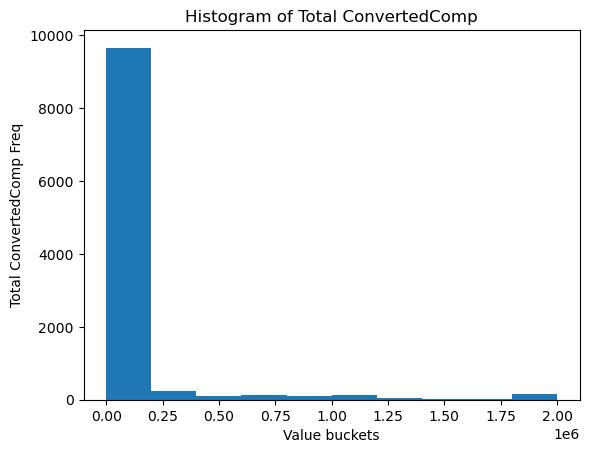

In [26]:
# matplot lib. Another way would be to use numpy/numpy.linspace or artist layer. Seaborn would be another option
df['ConvertedComp'].plot(kind= 'hist') #call the df
plt.title('Histogram of Total ConvertedComp') #set title of plot
plt.ylabel('Total ConvertedComp Freq') #set y axis
plt.xlabel('Value buckets') #set x xis
plt.show() #display plot
# or df['ConvertedComp'].plot.hist(bins=12, alpha=0.5)
#Another option is  but would first need to convert the missing values and na's to mean/median or remove them
#count, bin_edges=np.histogram(df['ConvertedComp']) #call numpy histogram function on Converted Comp column to partition spread of data into 10 bins of equal width and return count/freq
#df['ConvertedComp'].plot(kind= 'hist', xticks=bin_edges) #call the df_canada for column 2013 dataframe and pass bin edges as additional parameter in our plot function
#plt.title('Histogram of ConvertedComp') #set title of plot
#plt.ylabel('ConvertedComp Freq') #set y axis
#plt.xlabel('Converted CompBuckets') #set x xis
#plt.show() #display plot


What is the median of the column `ConvertedComp`?


In [29]:
# your code goes here
print('median ConvertedComp is',df['ConvertedComp'].median())
print('median Age is',df['Age'].median())

median ConvertedComp is 57745.0
median Age is 29.0


How many responders identified themselves only as a **Man**?


In [30]:
# your code goes here
print('There are', df['Gender'].nunique(), 'unique Gender values in the survey:')

print('\nGender        value count')      
print('------        -----------')
print(df['Gender'].value_counts())

print('\n', df['Gender'].eq('Man').sum(), 'respondents identify as "Man"')

There are 7 unique Gender values in the survey:

Gender        value count
------        -----------
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

 10480 respondents identify as "Man"


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [96]:
# create new dataframe using groupby() method on gender and median method on thr grouped entries
df_woman = df.groupby(["Gender"], as_index=False)["ConvertedComp"].median()
df_woman #call dataframe to check
#assign values of dataframe to y
y=df_woman[['Gender','ConvertedComp']] 
# returns the 4th row and 1st column of dataframe y which is the median we are looking for
print(y, '\n', 'The median ConvertedComp of responders identified themselves only as a Woman is', y.iloc[3,1])

                                              Gender  ConvertedComp
0                                                Man        57744.0
1  Man;Non-binary, genderqueer, or gender non-con...        59520.0
2  Non-binary, genderqueer, or gender non-conforming        67142.0
3                                              Woman        57708.0
4                                          Woman;Man        21648.0
5  Woman;Man;Non-binary, genderqueer, or gender n...        30244.0
6  Woman;Non-binary, genderqueer, or gender non-c...        65535.5 
 The median ConvertedComp of responders identified themselves only as a Woman is 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [103]:
# your code goes here
AgeSumm= df['Age'].describe()
AgeSumm

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


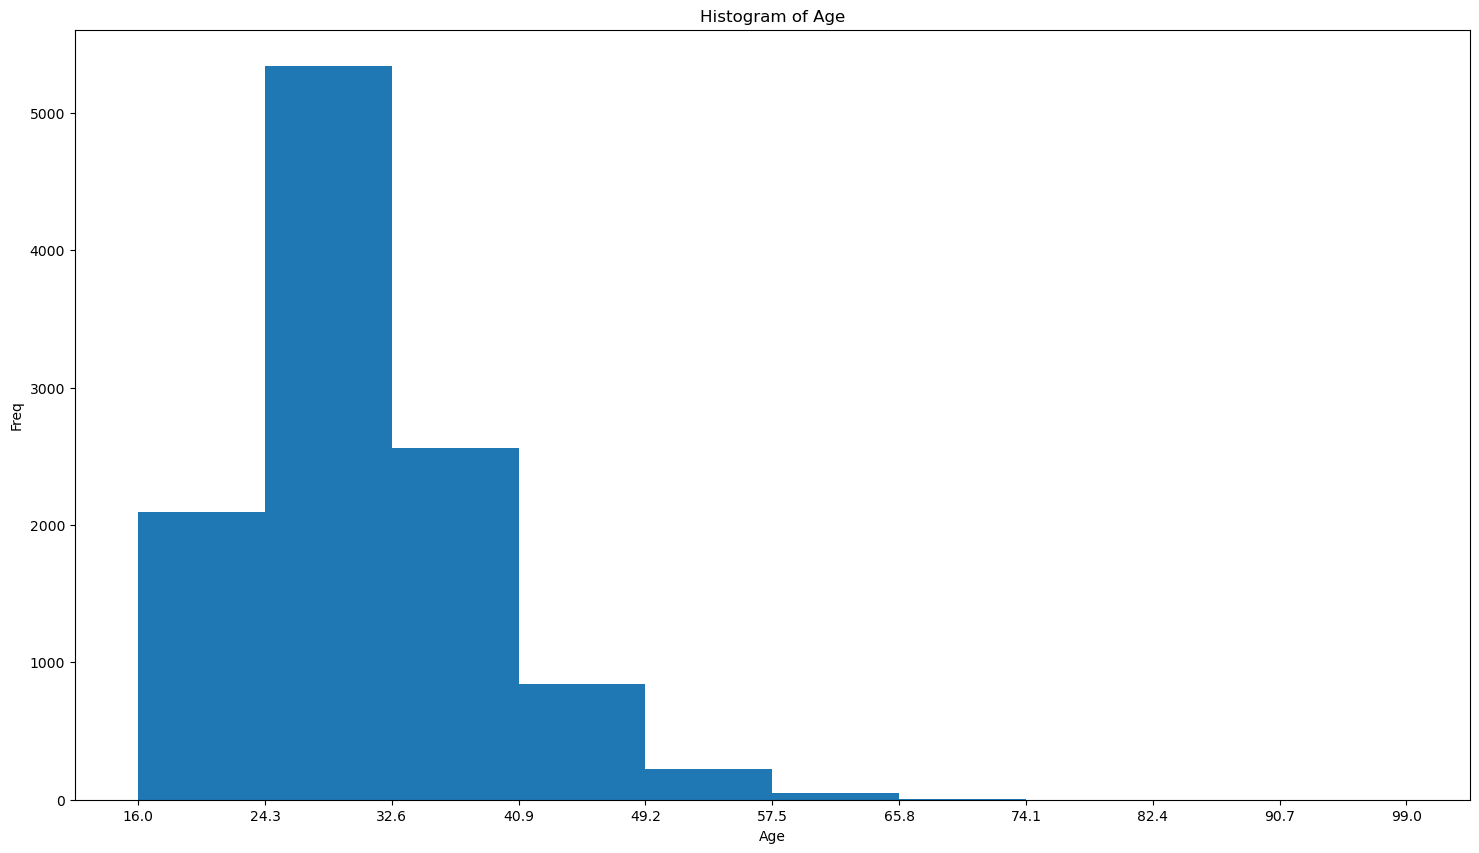

In [108]:
# refer to previous for different options of plotting
#df['Age'].plot.hist(bins=8, alpha=0.5) etc. etc.

count, bin_edges = np.histogram(df['Age'].dropna().transpose()) # numpy histogram option means bin_edges and count stores value of histogram with methods transpose and dropns incorporated on age column and numpy stores

df['Age'].plot(kind='hist', figsize=(18,10), xticks=bin_edges) #call dataframe and column['Age'] use.plot method from matplotlib kind is equal to hisogram, figuresize is 18 x 10, xticks=bin_edges means
                                                                #x axis is auto dumped to bins using numpy

plt.title('Histogram of Age') # add a title to the histogram
plt.ylabel('Freq') # add y-label
plt.xlabel('Age') # add x-label

plt.show() #print histogram

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


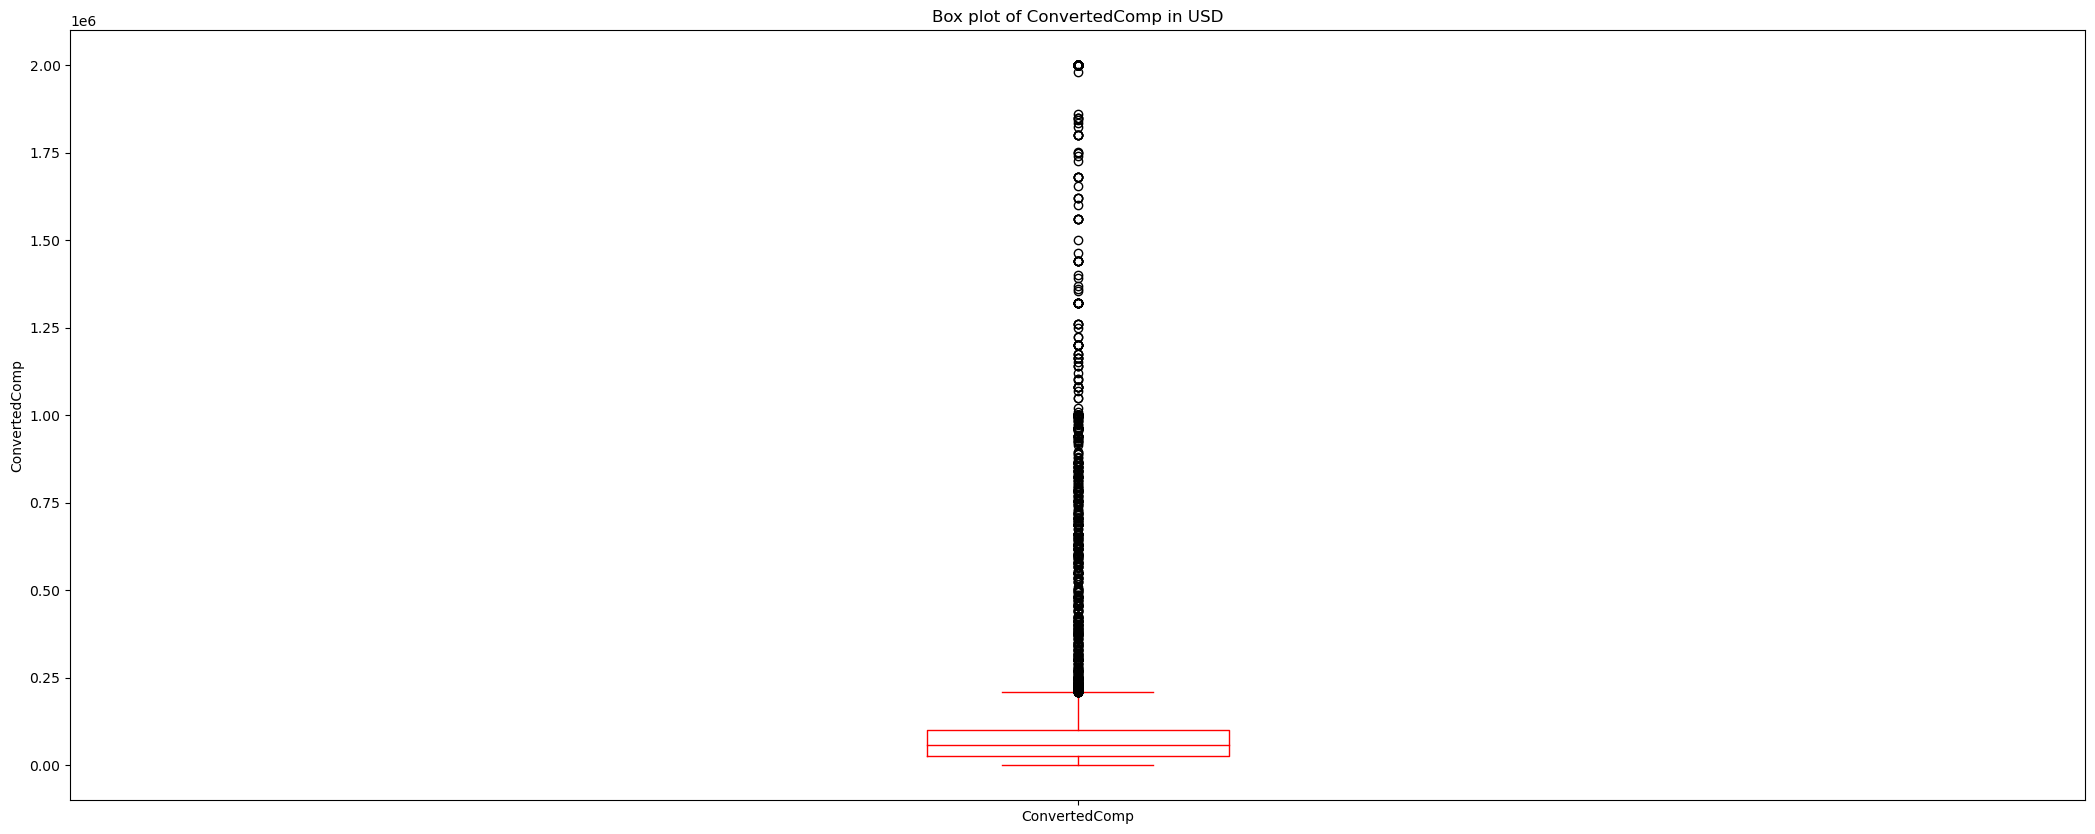

In [124]:
# could also use seaborn i.e. #sns.boxplot(x=df["ConvertedComp"])

df['ConvertedComp'].plot(kind='box', figsize=(26,10), color='r')
plt.title('Box plot of ConvertedComp in USD')
plt.ylabel('ConvertedComp')
plt.show()

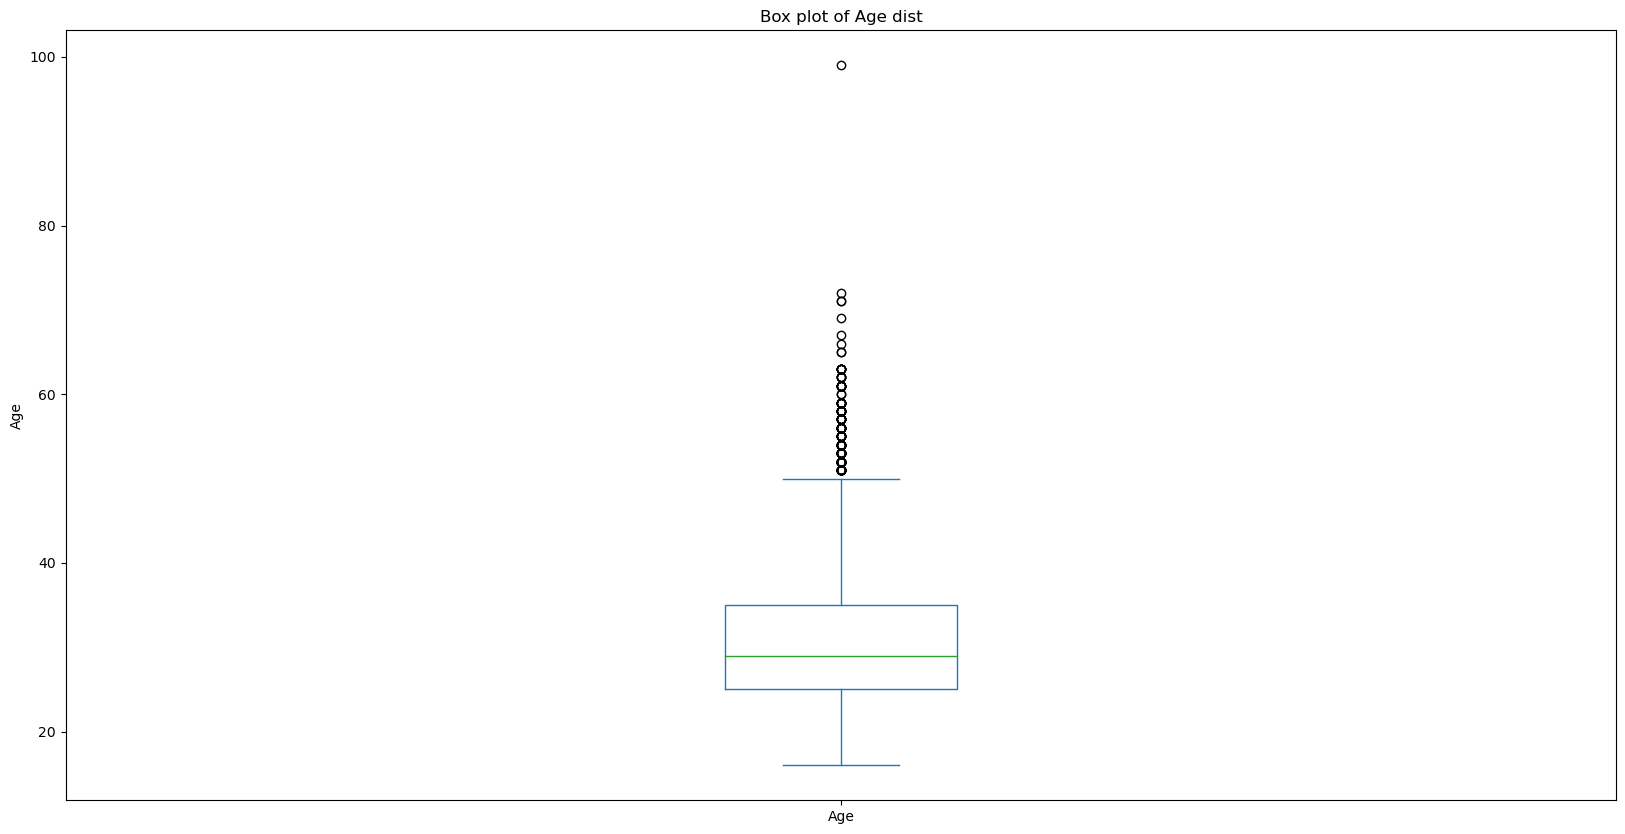

In [125]:
df['Age'].plot(kind='box', figsize=(20,10))

plt.title('Box plot of Age dist')
plt.ylabel('Age')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [130]:
# your code goes here

QUART1 = df['ConvertedComp'].quantile(0.25)
QUART3 = df['ConvertedComp'].quantile(0.75)
IQR = QUART3 - QUART1
print('The middle quartiles for ConvertedComp range from',QUART1, 'to',QUART3,'. The interquartile range is',IQR)

The middle quartiles for ConvertedComp range from 26868.0 to 100000.0 . The interquartile range is 73132.0


Find out the upper and lower bounds.


In [135]:
# your code goes here
UPPER = QUART3+1.5*IQR
LOWER = QUART1-1.5*IQR
print('Upper bounds is equal to', UPPER)
print('Lower bounds is equal to', LOWER)

Upper bounds is equal to 209698.0
Lower bounds is equal to 0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [145]:
# your code goes here
# It's an outlier if it is less than: Q1 - 1.5 * IQR. or if it is greater than: Q3 + 1.5 * IQR
LBO=df['ConvertedComp'].lt(QUART1 - 1.5*IQR).sum()
UBO =df['ConvertedComp'].gt(QUART3 + 1.5*IQR).sum()
print('Outliers below:',LBO)
print('Outliers above:',UBO)
print('Median with outliers:',df['ConvertedComp'].median())

Outliers below: 0
Outliers above: 879
Median with outliers: 57745.0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [192]:
# your code goes here
outliers = df[(df['ConvertedComp'] > 209698.0)|(df['ConvertedComp'] < 0)].index
df['ConvertedComp'].drop(outliers, inplace=True)

print('median ConvertedComp after removal of outliers is',df['ConvertedComp'].median())
print('mean ConvertedComp after removal of outliers is',df['ConvertedComp'].mean())
df.shape

median ConvertedComp after removal of outliers is 52704.0
mean ConvertedComp after removal of outliers is 59883.20838915799


(10519, 85)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [189]:
# your code goes here
df.corr()['Age']

Respondent       0.003950
CompTotal        0.006371
ConvertedComp    0.401821
WorkWeekHrs      0.037452
CodeRevHrs      -0.017961
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
